# 0.0.Entendimento do Problema.

**1.Objetivo do Projeto:** O objetivo do projeto é prever se um cliente vai dar churn ou não, ou seja, no fim projeto eu quero ter alguma forma de identificar os clientes que tem um grande potencial de ser churn.

**2.Para que o projeto vai servir?** Acredito que seja pelo motivo da empresa querer saber previamente qual cliente vai deixa-la, assim podendo fazer campanhas, descontos ou coisas do tipo para que consiga manter aquele cliente e assim não perder dinheiro, pois um cliente churn gera muitos prejuízos para empresa.

**3.Qual a métrica de negócio o projeto vai melhorar?** Esse e um problema que afeta todos os tipos de negócio, por exemplo nesse projeto eu vou ter dados do Telecom que geralmente funcionam como um sistema de assinatura mensal, ou seja, a receita é: Receita = valor assinatura * 12, pensando assim caso o cliente de churn que significa cancelar a assinatura no mês de janeiro o prejuízo para empresa vai ser de: Prejuízo = valor assinatura * 12, pois como e um sistema de assinatura as empresas vão deixar de ganhar 12 vezes o valor da assinatura, por esse motivo que o projeto vai afetar diretamente a renda da empresa pois garantido que tal cliente fique ou já se planejando para o possível cancelamento do cliente a empresa tem menos prejuízo.

**4.Prosposta de Solução:** Para Resolver esse problema eu vou usar dados de cliente que não deram churn e cliente que deram churn, pois com base nesses dados eu posso criar um modelo de ML (Machine Learning) que quando o cliente tiver as mesmas ou semelhante características de um cliente que deu churn no passado, ele já avise a empresa que aquele e um possível churn, e assim fazendo a empresa já preparar alguma campanha de marketing que mantenha o cliente ou se preparar para o potencial prejuízo.

**5.O que vamos querer ter no final do projeto?** Tenho dois objetivos no fim do projeto que são:
- 1.Um modelo que tenha uma acurácia maior de 80%, garantindo assim a boa assertividade das previsões.
- 2.Uma classe que funcione como um API, ou seja, que faça todos os processos de limpeza, Rescaling...etc. nos dados que receber e retorne um arquivo json, para que no futuro o modelo possa ser colocado em produção.

OBS: Eu sei que o problema de churn e um acumulado de perca de dinheiro para empresa, não apenas nos primeiros 12 meses, porém eu quis simplificar o cálculo da receita e prejuízo afins didáticos mesmo.

# 1.0.Impots

In [1]:
##pattern libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#----------------------------------
#Machine Learning Libraries
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing as pp
from keras import models as ml
from keras import layers as l
#----------------------------------
#Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, balanced_accuracy_score, cohen_kappa_score
from scikitplot import metrics as mt
#----------------------------------

#Filter Warnings
import warnings
warnings.filterwarnings("ignore")
#-------------------

#Show all columns
pd.set_option('display.max_columns', None)

## 1.1.Load Data

In [2]:
df_raw = pd.read_csv('datasets/Telecom_customer churn.csv')

## 1.2.Help Functions

In [3]:
def cross_validation(model_name,model,num_folds,x_train,y_train,verbose=False):
    
    acurracy_score_list      = []
    Balacend_Acurracy_list   = []
    Kappa_Score_list         = []
    
    #generate k-fold
    Kfold = StratifiedKFold(n_splits=num_folds,shuffle=True,random_state=32)
    i=1
    for train_ix, val_ix in Kfold.split(x_train,y_train):
        if verbose:
            print('Folds: {}/{}'.format(i,num_folds))
            i+=1
        #get folds
        x_train_fold = x_train.iloc[train_ix]
        y_train_fold = y_train.iloc[train_ix]

        x_val_fold = x_train.iloc[val_ix]
        y_val_fold = y_train.iloc[val_ix]
        
        model_trained = model.fit(x_train_fold,y_train_fold)
        
        pred_nn = model_trained.predict(x_val_fold)
        
        acurracy_score = accuracy_score(y_val_fold,pred_nn)
        acurracy_score_list.append(acurracy_score)
        
        Balacend_Acurracy = balanced_accuracy_score(y_val_fold,pred_nn)
        Balacend_Acurracy_list.append(Balacend_Acurracy)
        
        Kappa_Score = cohen_kappa_score(y_val_fold,pred_nn)
        Kappa_Score_list.append(Kappa_Score)
        
    return pd.DataFrame({'Model Name':model_name,
                             'acurracy_score':np.round(np.mean(acurracy_score_list),2).astype(str)+ '+/- '+ np.round(np.std(acurracy_score_list),2).astype(str),
                             'Balacend_Acurracy':np.round(np.mean(Balacend_Acurracy_list),2).astype(str)+ '+/- '+ np.round(np.std(Balacend_Acurracy_list),2).astype(str),
                             'Kappa_Score':np.round(np.mean(Kappa_Score_list),2).astype(str)+ '+/- '+ np.round(np.std(Kappa_Score_list),2).astype(str)},index=[0])   
    
    
def data_dimensions(data):
    print('Number of rows: {}'.format(data.shape[0]))
    print('Number of columns: {}'.format(data.shape[1]))
    return None

# 2.0.Data Description

In [4]:
df1 = df_raw.copy()
df1.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005


## 2.1.Data Dimensions

In [5]:
data_dimensions(df1)

Number of rows: 100000
Number of columns: 100


## 2.2.Data dtypes

In [6]:
np.array(df1.dtypes.values)
pd.DataFrame(np.array(df1.dtypes.values),np.array(df1.dtypes.index)).T

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,object,object,object,int64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,float64,float64,float64,object,object,object,object,float64,float64,float64,object,float64,float64,object,float64,object,object,float64,object,float64,float64,object,object,float64,object,object,object,object,object,object,object,float64,int64


## 2.3.Change dtypes

In [7]:
#None to change

## 2.4.Check NA values

In [8]:
#get only columns with NA valeus
aux = pd.DataFrame(index=df1.isnull().sum().index, data=df1.isnull().sum().values).rename(columns={0:'Values'})
aux1 = aux[aux['Values'] >0].sort_values(by='Values',ascending=False)

#percent of null value
aux1['% null'] = round(100*aux['Values'] / df1.shape[0],2)
aux1[aux1['% null'] < 30]

,Values,% null
income,25436,25.44
adults,23019,23.02
infobase,22079,22.08
hnd_webcap,10189,10.19
prizm_social_one,7388,7.39
avg6mou,2839,2.84
avg6rev,2839,2.84
avg6qty,2839,2.84
kid6_10,1732,1.73
creditcd,1732,1.73


## 2.5.Remove or Fill NA values

**Cretério de Remoção de colunas:**

Colunas com mais de 30% dos valores faltantes eu vou remover.


**Critério de Preenchimento de colunas:**

Vou olhar a distribuição da variável, o valor mais frequente, média, mediana, em busca de achar o melhor valor que condiz com a realidade e não coloca viez nos dados.

**Descrição da análise:**

**Feature Income:** Plotei uma gráfico de histrograma para analisar a distribuição, também analisei a média, median e moda e percebi que estão bem proximas uma das outras, então foi assim que escolhi usar a mediana no preenchimento.

**Feature Adults:** Mesma coisa que fiz na feature de income, e obtive resultados semelhante de proximidade das medidas de pocisão.

**Feature infobase**: Tem um enorme desbalanceamento nos dados, tendo o valor M possuindo 99% dos dados, então ou colocaram N sem querer e foi um erro de sistema ou está variavel está muito desbalancendo, bem mais pra frente vou fazer uma análise por cima de importancia de variável então vou deixar para analisar mais afundo nessa etapa, por enquanto vou substituir os valores faltantes por M mesmo.

**Feature hnd_webcap:** Mesma análise da variavel infobase, tem uma desbalanceamento de dados nas categorias, por enquanto o foco não e selecionar as melhores features então vou deixar como está para tratar mais tarde numa etapa com foco nisso.

Bem essas são as features que eu achei necessario ducocumentar a forma que eu iria prencher os dados, já que ela possuiam mais de 10% dos dados nulos, a partir daqui eu não vou documentar mais pois as variaveis tem menos de 7% de valores nulos então qualquer transformação que eu faça tem poucas chances de causa problemas, embora tratar variaveis categoricas seja complicado pela grande possibilidade de inviezar os dados, mas vou testar substuir pela moda, caso invieze então eu volto aqui e escolho outra abordagem como por exemplo exclui os valores NA

In [9]:
columns_drop = ['numbcars', 'dwllsize', 'HHstatin', 'ownrent', 'dwlltype', 'lor'] #cols with more of 30% of valeus NA
df1 = df1.drop(columns_drop,axis=1)

#feature: income
#method: median
df1['income'] = df1['income'].fillna(df1['income'].median())

#feature: adults
#method: median
df1['adults'] = df1['adults'].fillna(df1['adults'].median())

#feature: infobase
#method: mode
df1['infobase'] = df1['infobase'].fillna(df1['infobase'].mode()[0]) 

#feature: hnd_webcap
#method: mode
df1['hnd_webcap'] = df1['hnd_webcap'].fillna(df1['hnd_webcap'].mode()[0])  

#feature: prizm_social_one
#method: mode
df1['prizm_social_one'] = df1['prizm_social_one'].fillna(df1['prizm_social_one'].mode()[0])


#feature: avg6mou
#method: median
df1['avg6mou'] = df1['avg6mou'].fillna(df1['avg6mou'].median()) 

#feature: avg6rev
#method: median
df1['avg6rev'] = df1['avg6rev'].fillna(df1['avg6rev'].mean()) 

#feature: avg6rev
#method: mode
df1['avg6qty'] = df1['avg6qty'].fillna(df1['avg6qty'].mode()[0]) 

#feature: kid6_10
#method: mode
df1['kid6_10'] = df1['kid6_10'].fillna(df1['kid6_10'].mode()[0])

#feature:creditcd
#method: I will consider that null values are customers without credit.
df1['creditcd'] = df1['creditcd'].fillna("N") 

#feature: kid16_17
#method: mode
df1['kid16_17'] = df1['kid16_17'].fillna(df1['kid16_17'].mode()[0])

#feature: kid11_15
#method: mode
df1['kid11_15'] = df1['kid11_15'].fillna(df1['kid11_15'].mode()[0]) 

#feature: rv
#method: mode
df1['rv'] = df1['rv'].fillna(df1['rv'].mode()[0]) 

#feature: truck
#method: mode
df1['truck'] = df1['truck'].fillna(df1['truck'].mode()[0]) 

#feature: kid0_2
#method: mode
df1['kid0_2'] = df1['kid0_2'].fillna(df1['kid0_2'].mode()[0]) 

#feature: kid3_5
#method: mode
df1['kid3_5'] = df1['kid3_5'].fillna(df1['kid3_5'].mode()[0])

#feature: ethnic
#method: mode
df1['ethnic'] = df1['ethnic'].fillna(df1['ethnic'].mode()[0]) 

#feature: forgntvl
#method: mode
df1['forgntvl'] = df1['forgntvl'].fillna(df1['forgntvl'].mode()[0]) 

#feature: marital
#method: mode
df1['marital'] = df1['marital'].fillna(df1['marital'].mode()[0]) 

#feature: change_mou
#method: mode
df1['change_mou'] = df1['change_mou'].fillna(df1['change_mou'].mode()[0]) 

#feature: change_rev
#method: mode
df1['change_rev'] = df1['change_rev'].fillna(df1['change_rev'].mode()[0]) 

#feature: hnd_price
#method: median
df1['hnd_price'] = df1['hnd_price'].fillna(df1['hnd_price'].median()) 

#feature: rev_Mean
#method: mean
df1['rev_Mean'] = df1['rev_Mean'].fillna(df1['rev_Mean'].mean())  
                                                                    
#feature: mou_Mean
#method: mean
df1['mou_Mean'] = df1['mou_Mean'].fillna(df1['mou_Mean'].mean()) 
              
#feature: mou_Mean
#method: mean
df1['ovrmou_Mean'] = df1['ovrmou_Mean'].fillna(df1['ovrmou_Mean'].mean()) 

#feature: roam_Mean
#method: mean
df1['roam_Mean'] = df1['roam_Mean'].fillna(df1['roam_Mean'].mean()) 

#feature: vceovr_Mean
#method: mean
df1['vceovr_Mean'] = df1['vceovr_Mean'].fillna(df1['vceovr_Mean'].mean())

#feature: datovr_Mean
#method: mean
df1['atovr_Mean'] = df1['datovr_Mean'].fillna(df1['datovr_Mean'].mean())                                 
                                                                    
#feature: ovrrev_Mean
#method: mean
df1['ovrrev_Mean'] = df1['ovrrev_Mean'].fillna(df1['ovrrev_Mean'].mean())  

#feature: da_Mean
#method: mean
df1['da_Mean'] = df1['da_Mean'].fillna(df1['da_Mean'].mean())
 
#feature: totmrc_Mean
#method: mean
df1['totmrc_Mean'] = df1['totmrc_Mean'].fillna(df1['totmrc_Mean'].mean())  

#feature: area
#method: mode
df1['area'] = df1['area'].fillna(df1['area'].mode()[0])

#vou excluir o resto dos valores nulos já que são apenas um valor.
df1 = df1.dropna()

In [10]:
data_dimensions(df1)

Number of rows: 99642
Number of columns: 95


# 3.0.Data Filtering

In [11]:
df2 = df1.copy()
df2.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,marital,adults,infobase,income,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID,atovr_Mean
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,S,1.0,M,4.0,0.0,N,U,U,U,U,U,Y,361.0,1000001,0.0
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,99.98999,7.0,6.0,WC,1.0,1.0,S,1.0,M,5.0,0.0,Z,U,U,U,U,U,Y,240.0,1000002,0.0
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,WCMB,0.0,0.0,M,2.0,M,5.0,0.0,N,U,Y,U,U,U,Y,1504.0,1000003,0.0
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,WCMB,0.0,0.0,M,4.0,M,6.0,0.0,U,Y,U,U,U,U,Y,1812.0,1000004,0.0
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,S,1.0,M,6.0,0.0,I,U,U,U,U,U,Y,434.0,1000005,0.0


## 3.1.Filter Columns

In [12]:
i=1
for valor in range(0,5):
    print(i,valor)
    i+= 1

1 0
2 1
3 2
4 3
5 4


## 3.2.Filter Rows

# 4.Data Preparation

In [13]:
df3 = df2.copy()

In [14]:
#one hot enconder in categorical data
df3 = pd.get_dummies(df3)

In [15]:
data_dimensions(df3)

Number of rows: 99642
Number of columns: 206


# 5.Feature Selection

In [16]:
df4 = df3.copy()
df4.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,hnd_price,phones,models,truck,rv,adults,income,forgntvl,eqpdays,Customer_ID,atovr_Mean,new_cell_N,new_cell_U,new_cell_Y,crclscod_A,crclscod_A2,crclscod_A3,crclscod_AA,crclscod_B,crclscod_B2,crclscod_BA,crclscod_C,crclscod_C2,crclscod_C5,crclscod_CA,crclscod_CC,crclscod_CY,crclscod_D,crclscod_D2,crclscod_D4,crclscod_D5,crclscod_DA,crclscod_E,crclscod_E2,crclscod_E4,crclscod_EA,crclscod_EC,crclscod_EF,crclscod_EM,crclscod_G,crclscod_GA,crclscod_GY,crclscod_H,crclscod_I,crclscod_IF,crclscod_J,crclscod_JF,crclscod_K,crclscod_L,crclscod_M,crclscod_O,crclscod_P1,crclscod_S,crclscod_TP,crclscod_U,crclscod_U1,crclscod_V,crclscod_V1,crclscod_W,crclscod_Y,crclscod_Z,crclscod_Z1,crclscod_Z2,crclscod_Z4,crclscod_Z5,crclscod_ZA,crclscod_ZF,crclscod_ZY,asl_flag_N,asl_flag_Y,prizm_social_one_C,prizm_social_one_R,prizm_social_one_S,prizm_social_one_T,prizm_social_one_U,area_ATLANTIC SOUTH AREA,area_CALIFORNIA NORTH AREA,area_CENTRAL/SOUTH TEXAS AREA,area_CHICAGO AREA,area_DALLAS AREA,area_DC/MARYLAND/VIRGINIA AREA,area_GREAT LAKES AREA,area_HOUSTON AREA,area_LOS ANGELES AREA,area_MIDWEST AREA,area_NEW ENGLAND AREA,area_NEW YORK CITY AREA,area_NORTH FLORIDA AREA,area_NORTHWEST/ROCKY MOUNTAIN AREA,area_OHIO AREA,area_PHILADELPHIA AREA,area_SOUTH FLORIDA AREA,area_SOUTHWEST AREA,area_TENNESSEE AREA,dualband_N,dualband_T,dualband_U,dualband_Y,refurb_new_N,refurb_new_R,hnd_webcap_UNKW,hnd_webcap_WC,hnd_webcap_WCMB,marital_A,marital_B,marital_M,marital_S,marital_U,infobase_M,infobase_N,ethnic_B,ethnic_C,ethnic_D,ethnic_F,ethnic_G,ethnic_H,ethnic_I,ethnic_J,ethnic_M,ethnic_N,ethnic_O,ethnic_P,ethnic_R,ethnic_S,ethnic_U,ethnic_X,ethnic_Z,kid0_2_U,kid0_2_Y,kid3_5_U,kid3_5_Y,kid6_10_U,kid6_10_Y,kid11_15_U,kid11_15_Y,kid16_17_U,kid16_17_Y,creditcd_N,creditcd_Y
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,149.98999,2.0,2.0,0.0,0.0,1.0,4.0,0.0,361.0,1000001,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,99.98999,7.0,6.0,1.0,1.0,1.0,5.0,0.0,240.0,1000002,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0

In [17]:
X = df4.drop('churn',axis=1)
y = df4['churn']

# 6.Machine Learning

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=32)

In [19]:
#drop customer id
x_train = X_train.drop('Customer_ID',axis=1)
x_test = X_test.drop('Customer_ID',axis=1)

## 6.1Gaussian NB

In [20]:
model_gaussian = GaussianNB()

#train model
model_gaussian.fit(x_train,y_train)

#predict
result_gausian = model_gaussian.predict(x_test)

## 6.2.LogisticRegression

In [21]:
model_logic = LogisticRegression()

#train data
model_logic.fit(x_train,y_train)

#predict
result_logic = model_logic.predict(x_test)

# 7.0.Perfomance

## Simple Perfomance

### 7.1.Gausian nb Model

Accuracy Score Gausian: 51.54%
              precision    recall  f1-score   support

           0       0.57      0.17      0.27     15105
           1       0.51      0.86      0.64     14788

    accuracy                           0.52     29893
   macro avg       0.54      0.52      0.45     29893
weighted avg       0.54      0.52      0.45     29893



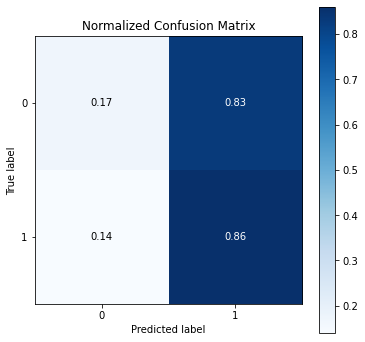

In [22]:
#accuracy
print('Accuracy Score Gausian: {:.2%}'.format(accuracy_score(y_test,result_gausian)))
#Model Gausian
print(classification_report(y_test,result_gausian))

#Model Gausian
mt.plot_confusion_matrix(y_test, result_gausian, normalize=True, figsize=(6,6));

### 7.2.Logistic Regression

Accuracy Score Logistic Regression: 57.19%
              precision    recall  f1-score   support

           0       0.57      0.60      0.59     15105
           1       0.57      0.54      0.56     14788

    accuracy                           0.57     29893
   macro avg       0.57      0.57      0.57     29893
weighted avg       0.57      0.57      0.57     29893



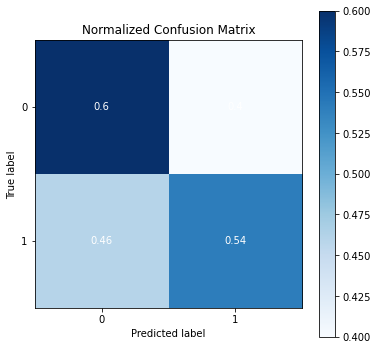

In [23]:
#accuracy
print('Accuracy Score Logistic Regression: {:.2%}'.format(accuracy_score(y_test,result_logic)))
#Model Gausian
print(classification_report(y_test,result_logic))

#Model Gausian
mt.plot_confusion_matrix(y_test, result_logic, normalize=True, figsize=(6,6));

## 7.3.Cross Validation Perfomance

### 7.3.1.Gausian Nb Cross Val

In [24]:
model_gausian_cross = GaussianNB()
cross_validation("Gausian NB",model_gausian_cross,5,x_train,y_train,verbose=True)

Folds: 1/5
Folds: 2/5
Folds: 3/5
Folds: 4/5
Folds: 5/5


,Model Name,acurracy_score,Balacend_Acurracy,Kappa_Score
0,Gausian NB,0.52+/- 0.01,0.52+/- 0.01,0.04+/- 0.01


### 7.3.2.Logistic Regression Cross Val

In [25]:
mode_logistic_cross = LogisticRegression()
cross_validation("Logistic Regression",mode_logistic_cross,5,x_train,y_train,verbose=True)

Folds: 1/5
Folds: 2/5
Folds: 3/5
Folds: 4/5
Folds: 5/5


,Model Name,acurracy_score,Balacend_Acurracy,Kappa_Score
0,Logistic Regression,0.58+/- 0.0,0.58+/- 0.0,0.15+/- 0.01


# Conclusão

**O que foi feito nessa etapa?**
Nessa etapa eu executei dois passos importantes que são:
- 1: Preenchimento de dados NA
   - Na etapa passada de conhecimento dos dados e análise do problema, eu pude perceber que existia muitos dados Nulos nas colunas, algumas possuíam até 30% dos seus dados nulos, para resolver isso nessa etapa eu exclui as colunas com mais de 30% dos dados nulos, essa foi uma decisão que tomei, claro que pode ser mudada no futuro por exemplo caso eu execute um novo ciclo de preenchimento de valores NA. Para o restante eu preenchi com a média, mediana, moda e com um pouco de raciocínio lógico para entender o porquê de algumas colunas estarem vazias, com isso nos recuperados quase 100% dos nossos dados, antes na etapa passada eu tinha perdido 40 mil linhas quando eu escolhi remover os valores NA agora eu perdi apenas 1 linha, então agora o modelo tem mais dados para aprender e performar melhor.
  
- 2: Cross Validation:
    - Ela e importante para trazer o erro real do meu modelo, caso na etapa de preencher valores NA eu fizesse alguma besteira, eu iria poder ver claramente a diferença na Cross validai-o e na análise de performance normal.

**O que será feito na próxima etapa?**
- Feature Engienner and Description Data:
   - Feature Engienner: Vou buscar fazer uma categorização melhor nas minhas variáveis, criando colunas que consigam resumir de uma melhor forma, só que com poucos valores distintos, vou buscar também unir colunas para que os dados não fiquem com dimensões tão grandes e deixe os modelos de Machine learning mais complexo, pois e sempre melhor deixa o mais simples possível, ele aprende melhor e consegue ser mais genérico.
    - Description Data: Vou analisar as distribuições e métricas de média, mediana, etc... vou analisar se meus dados estão coerentes com a realidade, caso não estejam eu já removo para evitar problemas mais para frente, como estou trabalhando sozinho eu que vou tomar a decisão do motivo de remoção, então eu buscar documentar o que eu fizer na etapa seguinte.

**Proxima Etapa**

Feature Engienner